Foster Seeley Discriminator
- 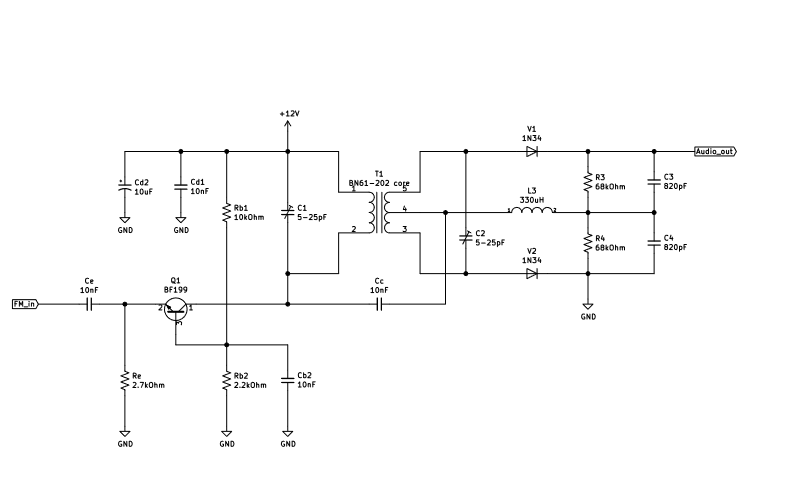

The general principle behind a Foster-Seeley Discriminator is that when the frequency of the input signal is at the resonant frequency of the LC oscillator, the output voltage is 0, because the voltage across the two capacitors on the right (C3 and C4) are equal and opposite. However, when the frequency of the input signal goes away from the resonant frequency, the phase of the top and bottom of the center tapped transformer voltages change in opposite direction. This phase change is then converted to a voltage by adding the two signals together at the output nodes.

In order to understand the Foster-Seeley Discriminator, we first have to understand the model of a transfomer:
- 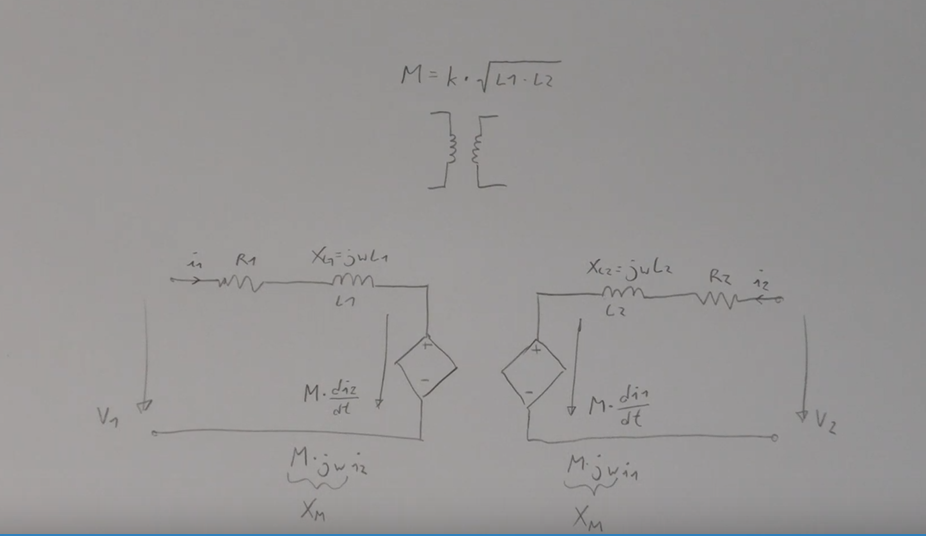
- M is the mutual inductance between the coils, k is the coupling coefficient of the transformer. We want k to be very small so that we can ignore the mutual inductance for the voltage at the input.
- 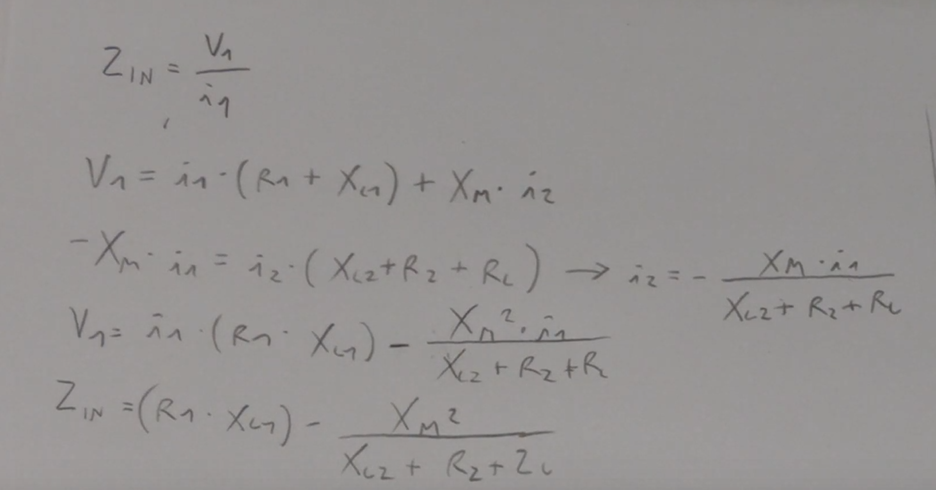
- When calculating the impedance looking into the left side of the circuit, we can see that it is made up of two parts - the RXl term, which contains the impedance when there is no mutual inductance, and the part representing the mutual inductance.

We also need to understand the basics of LC circuits:
- 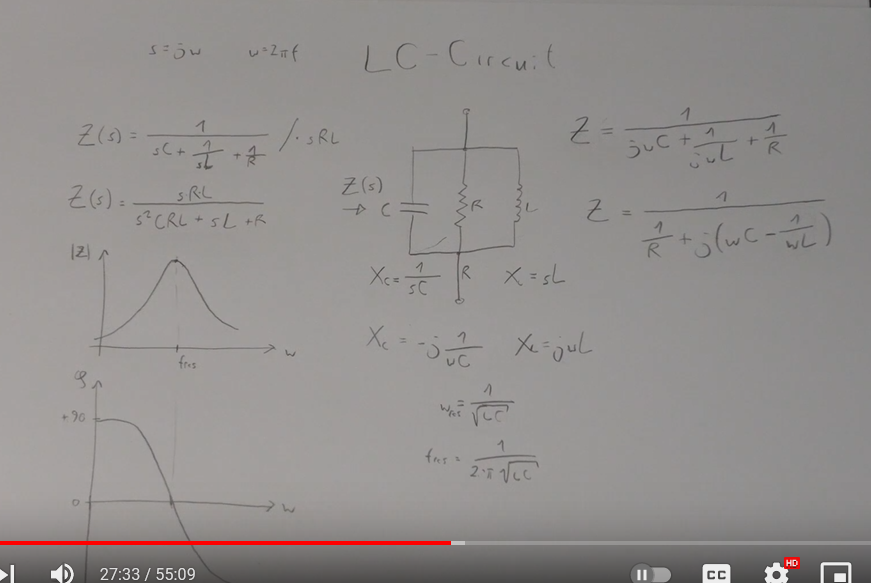
- At low frequencies, inductance dominates, so the phase shift is +90 degrees.
- At high frequencies, capacitance dominates, so the phase shift is -90 degrees.

Now getting to the actual circuit. Since the Impedance of Cc and C4 are typically, very small, Vl3 ~= Vin.
- 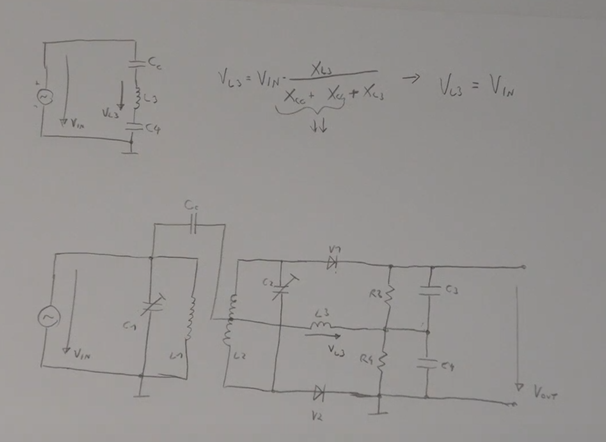

Since the coupling coefficient k is small, it results in a 90 degree phase shift in V2.
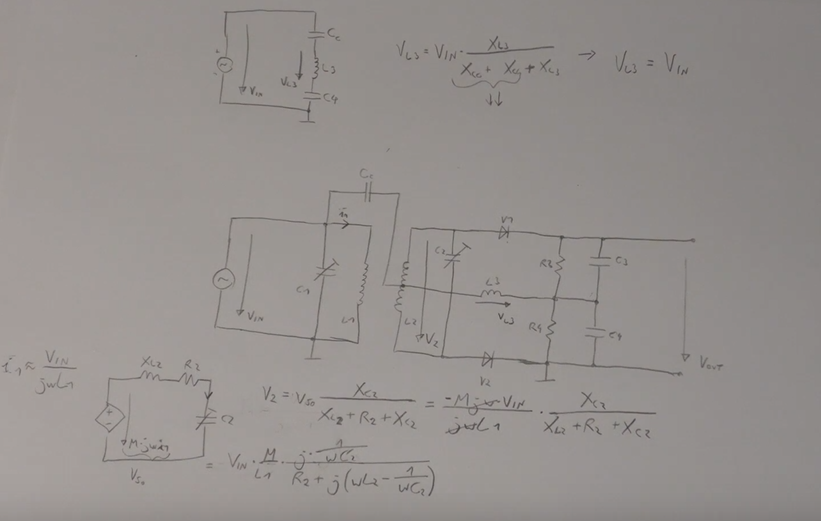


- When the input signal is at the resonant frequency of the oscillator, wL2 = 1/wC2 so the phase for V2 is just -j/wC2 (the picture above is missing a negative sign), which is a -90 degree phase shift.
- When the frequency goes above the resonant frequency of the oscillator on the right side, 1/wC2 < wL2. so the phase becomes (-j/wC2) / (R2 + jA), where A is a constant. For A = infinity, the phase becomes -180. In other words, the phase shifts towards -180. 

Observed this behavior in the transient sim:
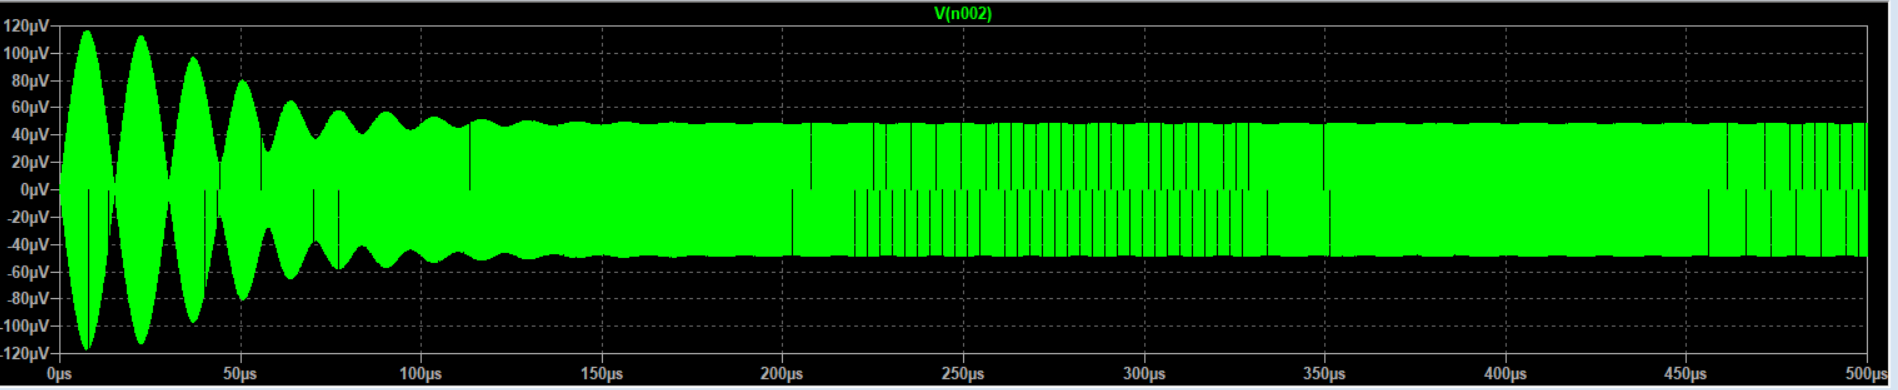

Not sure why this is happening, maybe it just how the resonator settles to it's resonant frequency. However, I think it doesn't really matter since the phase of the oscillator on the right is as expected in the AC sim.

The LTSpice modulator block isn't working as expected: It is supposed to oscillate between frequencies mark and space, but instead the formula seems to be the lower freq is mark and the higher freq = space + (space - mark). 

https://www.reddit.com/r/AskElectronics/comments/sb2ivl/how_does_the_modulator_block_in_ltspice_works/

For a frequency of 5k and 15k then, we need mark to be 5k and space to be 10k. This seems to work. Let's try this with other frequencies, e.g. mark = 20k and space = 20k. The lower freq should be 20k and the higher should be 20k. This is verified in simulation. Now let's try mark = 20k and space = 25k. The lower freq should be 20k and the higher should be 30k. This is confirmed in sim as well. This seems to be the correct formula!

- At the lowest freq (10 MHz), the phase across the cap on the output side is close to 180 (around 170 deg). This is true at all freq. I wonder why?
- Figured out the problem!! Has to do with initial conditions. my math doesn't account for that. https://www.youtube.com/watch?v=q90Lh8HELjo
- At high frequencies, the init. conds cause the system to ring and become unable to track the original signal with a 90 degree phase shift. This can be fixed by putting a lot of damping.
- This does NOT have to do with parasitics, since this occurs for ideal components in both LTSPICE (set all parasitics to 0) and circuitlab.
- Changing the capacitance on the right side to 9.76 pF instead of 10 pF changes the phase to 90 degrees for because it changes the resonant frequency, compensating for the high freq. ringing, AS LONG AS there is a load (I'm using a diode + 68k resistor on both top and bottom).

- The schematic from the video above has a supply voltage of 12V. The inductor acts like a wire at DC, so the emitter of the transistor is biased at 12V. However, if you try to connect an AC source with a DC voltage of 0V, then this is a short. The transistor only works because it is a current source, not a voltage source.

- Is it possible to use a high pass filter to only pass AC and then bias the source at 12V?

- When you add the cap to AC couple the input with the center tap, which is necessary for the discriminator to work since the center tap needs to have the same phase as the input, the phase shift becomes not 90 degrees.
HOW TO SOLVE THIS??
- Maybe try changing to 12V on top and signal on bottom and see if that does anything?

Part Choice calculations
- No easy way to calculate flux for transformer!! Best option is to buy binocular core and magnet wire asap and measure it.
https://www.reddit.com/r/askscience/comments/meez4v/is_there_a_formula_relating_distance_between_2/

temporary save in case we go back to the LT5562:

% !TEX root = C:/Users/piyus/knowledge/Project_Specific_Knowledge/public/fm_radio/stages/fm_detector/fm_detector.tex
\documentclass[12pt, letterpaper]{article}

\usepackage{hyperref}
\usepackage{graphicx}
\graphicspath{ {C:/Users/piyus/knowledge/Project_Specific_Knowledge/public/fm_radio/stages/fm_detector/pictures} }

\title{FM Detector Notes}
\author{Piyush Sud}
\date{10/20/2024}
\begin{document}
\maketitle

\pagebreak

\section{High Level Design}

There are a few different types of fm detectors that are commonly used:

\begin{itemize}
    \item Foster-Seeley Discriminator
    \item Ratio Detector
    \item Quadrature Discriminator
\end{itemize}

\noindent Out of all of these, the Quadrature Discriminator seems to be the best for a few reasons:

\begin{itemize}
    \item Has a simple design only requiring a few components.
    \item Does not require an RF transformer, which needs to be weakly coupled in the case of the Foster-Seeley Discriminator - cannot easily find one off of digikey/mouser.
    \item Works with low input levels and has good linearity.
\end{itemize}

\section{Principle of Operation}

\begin{figure}[h]
    \includegraphics[width=\textwidth]{fm_discriminator}
\end{figure}

The original signal is 

\[Acos(wt)\] 

The signal after C2 is shifted by 90 degrees due to the capacitor, and additionally shifted by \(\phi\) due to the difference between the resonant frequency of the tank circuit and the incoming FM signal. Therefore the signal after C2 is 

\[Acos(wt + \frac{\pi}{2} + \phi)\] 

Multiplying these two together gives 

\[Acos(wt) * Acos(wt + \frac{\pi}{2} + \phi)\] 

By the identity \(cos(a)cos(b) = \frac{1}{2}[cos(a-b) + cos (a+b)] \),

\[= \frac{A^2}{2}cos(-\pi/2 - \phi) + cos(2wt + \frac{\pi}{2} + \phi)\] 

Noting that \(cos(-\pi/2 - \phi) = sin(\phi)\), 

\[= \frac{A^2}{2}sin(\phi) + cos(2wt + \frac{\pi}{2} + \phi)\] 

The higher frequency cosine component can be filtered out, leaving a function whose amplitude is proportional to the phase, which in turn is proportional to \(sin(\phi)\). For small values of \(\phi\), this is approximately equal to \(\phi\).

\section{Detailed Design}

\begin{itemize}
    \item For the tank circuit, the self resonant frequency is given by \( \frac{1}{2\pi \sqrt{RC}}\). If we choose L = 0.1 uH, then for a resonant frequency of 10.7 MHz, this gives us 2.21 nF. 
    \item For the 90 degree phase shift cap, we can use a small 10 pF cap. 
    \item Since the inductor and capacitor values are not exact, the resonant frequency of the tank circuit will not be exactly 10.7 MHz. This will result in a phase error \(\alpha\). This means that the output will be offset by some smallamount. However, this will show up as a DC signal since it's not dependent on the input, so we can AC couple the output to solve this issue.
    \item We need a mixer that can mix down to very low frequencies, since the mono baseband is typically 50 Hz to 15 kHz. We can use the LTC5562 for that. 
\end{itemize}

\section{Mixer Impedance Matching}

\begin{itemize}
    \item For the LO, according to a table on the datasheet, for the frequency range 10 to 1200 MHz the series inductor should have an impedance of 0 ohms and the shunt capacitor should have an impedance of \(85 \Omega = 1/((10.7*10^6)C), => C = 1.0995 nF\) . The DC blocking cap should have a value of 1 nF. 
\end{itemize}

\[ out = \frac{A^2}{2}sin(\phi + \alpha) \]

\section{Simulations}
 
Here is a simulation of the tank circuit in the discriminator:



\begin{figure}[h]
    \includegraphics[width=\textwidth]{tank_circuit}
\end{figure}


\end{document}